## HCW CS transport

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import os

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout
import MetricsPythonTools as mpt

In [2]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('poster')


In [10]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col

def get_water(exp, run, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%s.csv' %(exp,run)))
    col = df[key]
    return col

def get_areas(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col

def get_column(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name and file name and path. All input 
    variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col



In [5]:
#Exp
#CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size
numTr = 17 # number of tracers in total 

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

In [6]:
colors = ["fresh green","soft green","shamrock green","dark mint green","peacock blue","sapphire","nice blue",
          "coral","tangerine","blood orange","scarlet","dark plum","purplish","cerise","amethyst","lavender pink"]
color_pal = sns.xkcd_palette(colors)

labels = ['Kv=1E-5, Ki=10',
          'Kv=1E-5, Ki=1,N=5.5E-3',
          'Kv=1E-5, Ki=0.1',
          'Kv=KTv=KSv=1E-4, Ki=1', # run11
          'Kv=KTv=KSv=1E-3, Ki=1,Kt=Ks',#run12
          'Kv=1E-5, Ki=1,N=3.9E-3',#run14
          'Kv=1E-5, Ki=1,N=6.3E-3',#run15
          'Kv=1E-5, Ki=1,N=3.0E-3',#run16
          'Kv=1E-7, Ki=1,KTv=KSv=1E-7',#run17
          'Kv=1E-5, f = 7.7E-5',#run18
          'Kv=1E-5, f = 4.8E-5',#run19
          'Kv=3.8E-5, Ki=1',#run20
          #'Kv=2.8E-5, Ki=1',#run21
          'Kv=1E-7(out), 1E-3(in), Ki=1',# 3Drun04
          'Kv=1E-7(out), 1E-4(in), Ki=1', # 3Drun05
          'Kv=1E-5(out), 1E-3(in), Ki=1',# 3Drun06
          'Kv=1E-5(out), 1E-4(in), Ki=1']# 3Drun07

          
         
wlabels = ['run02 - CNT','run03 - CNT','run04 - CNT','run11 - CNT','run12 - CNT',
           'run14 - CNT','run15 - CNT','run16 - CNT','run17 - CNT','run18 - CNT',
           'run19 - CNT','run20 - CNT',#'run21 - CNT',
           'run04 - 3D',
           'run05 - 3D','run06 - 3D','run07 - 3D']


times = np.arange(0,nt,1)


In [31]:
# GET HCW

water_3D = ['04','05','06','07'] #run number
water_CNT = ['02','03','04','11','12','14','15','16','17','18','19','20']#'21'] # run number , constant runs

numWat = len(water_3D)+len(water_CNT)

wCS1 = np.zeros((nt,numWat))
wCS2 = np.zeros((nt,numWat))
wCS3 = np.zeros((nt,numWat))
wCS4 = np.zeros((nt,numWat))
wCS5 = np.zeros((nt,numWat))
wCS3sb = np.zeros((nt,numWat))
wAS1 = np.zeros((nt,numWat))
wAS2 = np.zeros((nt,numWat))
wLID1 = np.zeros((nt,numWat))
wLID2 = np.zeros((nt,numWat))

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']



for ii in water_CNT:

    wCS1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[9] )
    kk=kk+1

for ii in water_3D:

    wCS1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[9] )

    kk=kk+1

CS = wCS1+wCS2+wCS3sb+wCS4+wCS5
Lid = wLID1+wLID2



In [32]:
deltaHCW = get_column('results/metricsDataFrames/DeltaTrOnShelf.csv', 'deltaHCW')
deltaTrMass = get_column('results/metricsDataFrames/DeltaTrOnShelf.csv', 'deltaTrMass')

In [33]:
marker = ['o','D','o','^','^','o','o','o','^','*','*','^','s','s','s','s']
indexList = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] # for transport vol/s
indexEq = [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16] # for HCW delta/delta t 


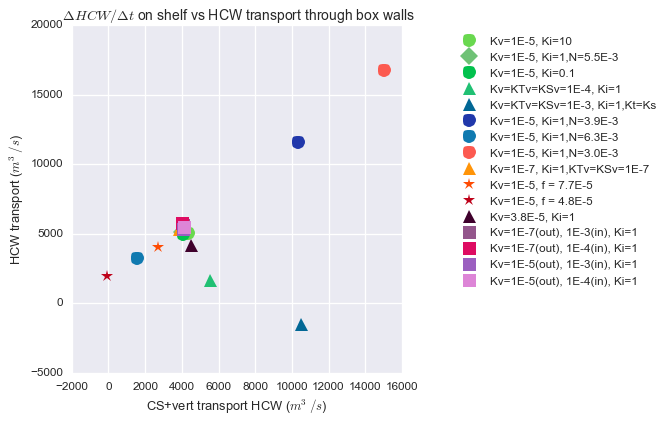

In [34]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))
sns.set_palette(color_pal)
jj=0

for ii,ee in zip(indexList,indexEq):
    
    ax1 = plt.subplot(1,1,1)
    
    plt.plot( np.nanmean(CS[10:,ii]+Lid[10:,ii]) ,deltaHCW[ee], marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('CS+vert transport HCW ($m^3/s$)')
    plt.title(' $\Delta HCW/\Delta t$ on shelf vs HCW transport through box walls ')
    
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


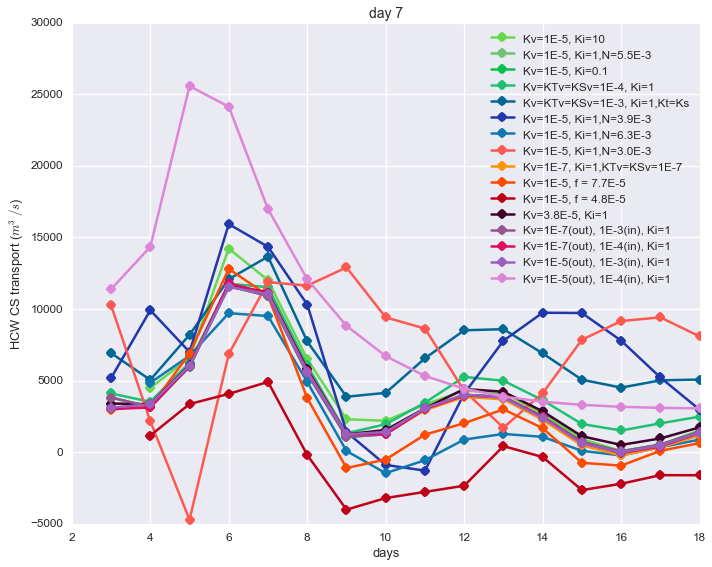

In [35]:
fig,(ax1) = plt.subplots(1,1, figsize = (10,8),sharex=True, sharey=True)

times = np.arange(19)


for ii,ee in zip(indexList,indexEq):
    
    ax1.plot(times,CS[:,ii],'o-',label = labels[ii])
    

ax1.legend(loc=0)
ax1.set_xlabel('days')
ax1.set_ylabel('HCW CS transport ($m^3/s$)')

plt.tight_layout()

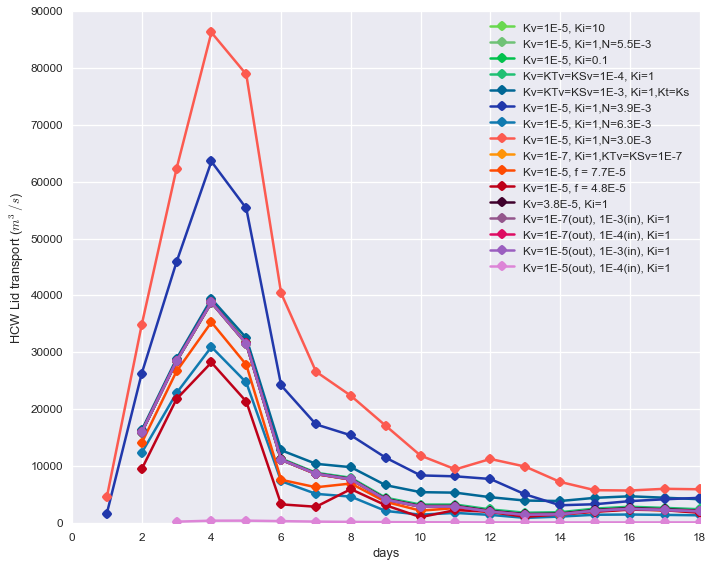

In [43]:
fig,(ax1) = plt.subplots(1,1, figsize = (10,8),sharex=True, sharey=True)


indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for ii in indices:
    
    ax1.plot(times[:],Lid[:,ii],'o-',label = labels[ii])

   

ax1.legend(loc=0)
ax1.set_xlabel('days')
ax1.set_ylabel('HCW Lid transport ($m^3/s$)')

plt.tight_layout()